# Standford Open Policing Project

In [2]:
# Importing libaries and excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
police=pd.read_csv("police.csv")

## Understanding the Data

In [3]:
police.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
# check the columns and rows
police.shape

(91741, 15)

In [5]:
# check the data types
police.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

## Data Cleaning

In [6]:
# check for missing value
police.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [7]:
# delete column that only contain missing value
police.drop("county_name",axis=1,inplace=True)

In [8]:
# change Stop_date from object to datetime
police["stop_date"]=police["stop_date"].astype("datetime64[ns]")

In [9]:
# create a new column for stop_year
police.insert(1,"stop_year","")
police["stop_year"]=police["stop_date"].dt.year

In [10]:
# create a new column for stop_month
police.insert(1,"stop_month","")
police["stop_month"]=police["stop_date"].dt.month

In [11]:
# create a new column for stop_day
police.insert(1,"stop_day","")
police["stop_day"]=police["stop_date"].dt.day_name()

In [12]:
police.head()

,stop_date,stop_day,stop_month,stop_year,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,Sunday,1,2005,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,Tuesday,1,2005,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,Sunday,1,2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,Sunday,2,2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,Monday,3,2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


## Data Analysis

### Demographic Analysis

<Axes: xlabel='driver_age'>

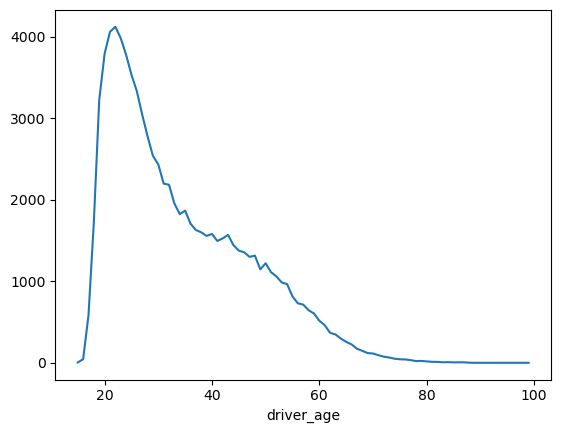

In [13]:
# Analyze the distribution of traffic stops by driver age
police.driver_age.value_counts().sort_index().plot()

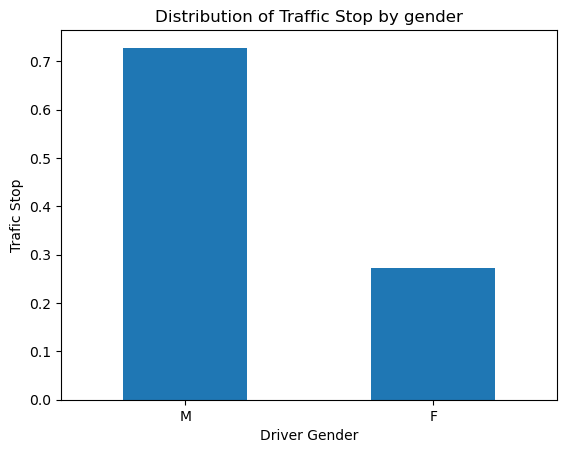

In [14]:
# Calculate the proportion of stops involving male and female drivers
stop_by_gender=police.driver_gender.value_counts(normalize=True)
# ploting the distribution of traffic stop by gender
stop_by_gender.plot(kind="bar", rot=0)
plt.xlabel("Driver Gender")
plt.ylabel("Trafic Stop")
plt.title("Distribution of Traffic Stop by gender")
plt.show()

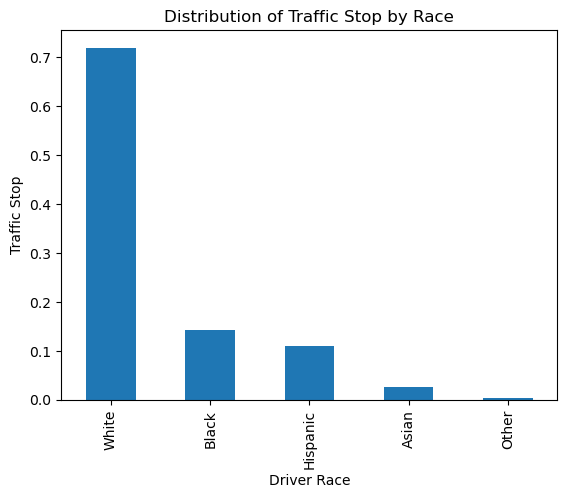

In [15]:
# Analyze the distribution of traffic stops by driver race
stop_by_race=police.driver_race.value_counts(normalize=True)
stop_by_race.plot(kind="bar")
plt.xlabel("Driver Race")
plt.ylabel("Traffic Stop")
plt.title("Distribution of Traffic Stop by Race")
plt.show()

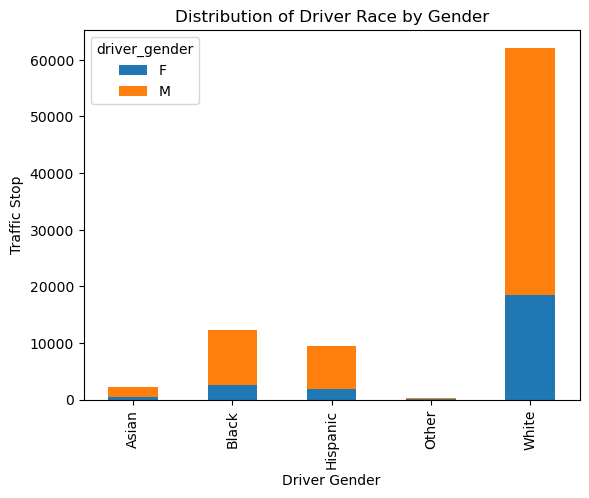

In [16]:
# Investigate the distribution of driver race by driver gender
Stop_by_gender_race=police.groupby("driver_race")["driver_gender"].value_counts().unstack(fill_value=0)
Stop_by_gender_race.plot(kind="bar",stacked=True)
plt.xlabel("Driver Gender")
plt.ylabel("Traffic Stop")
plt.title("Distribution of Driver Race by Gender")
plt.show()

### Violation Analysis 

In [17]:
# Examine the types of violations for which drivers are stopped
Violation_count=police.violation.value_counts().reset_index()

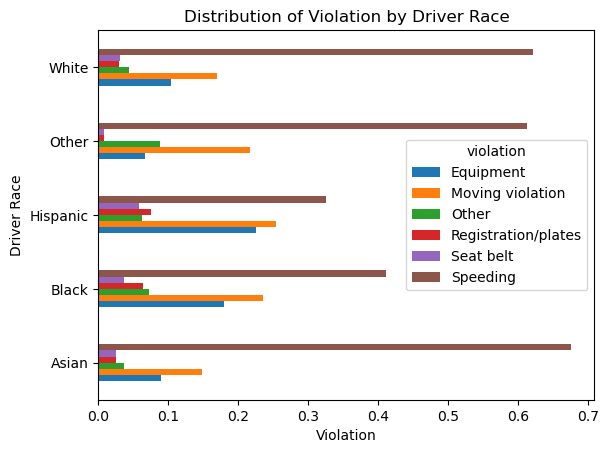

In [18]:
#Identify the most common violations and compare their frequencies by driver demographics
#Race
violation_by_race = police.groupby('driver_race')["violation"].value_counts(normalize=True).unstack()
violation_by_race.plot(kind="barh")
plt.xlabel("Violation")
plt.ylabel("Driver Race")
plt.title("Distribution of Violation by Driver Race")
plt.show()

In [19]:
#Identify the most common violations and compare their frequencies by driver demographics
#Age
# Create age groups
age_bins = list(range(0,100,10))
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Assign age groups to drivers
police['age_group'] = pd.cut(police['driver_age'], bins=age_bins, labels=age_labels, right=False)

# Group data by age group and violation
violation_by_age = police.groupby('age_group')['violation'].value_counts().unstack()
violation_by_age

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
age_group,,,,,,
0-20,0,0,0,0,0,0
21-30,718,766,124,156,126,3706
31-40,5229,5684,1049,1519,1434,20075
41-50,2487,3660,942,852,710,10319
51-60,1511,3119,1065,555,387,7485
61-70,806,2073,740,288,226,4729
71-80,215,693,241,50,53,1671
81-90,35,146,38,7,16,326
91-100,6,21,5,0,0,49


<Figure size 1200x800 with 0 Axes>

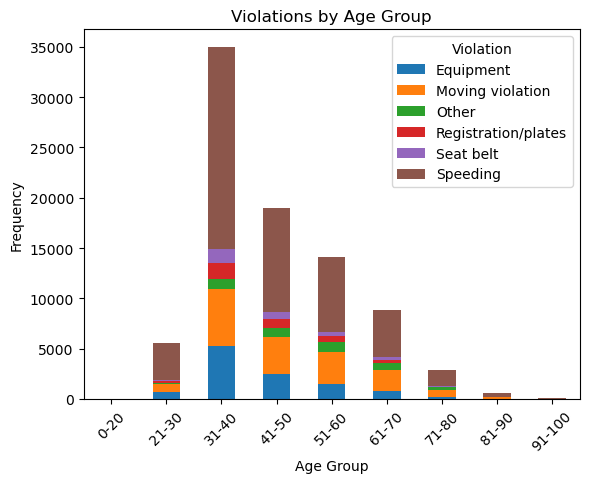

In [20]:
# plotting violation by age 
plt.figure(figsize=(12, 8))
violation_by_age.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Violations by Age Group')
plt.legend(title='Violation')
plt.xticks(rotation=45)
plt.show()

### Search Analysis

Text(0.5, 1.0, 'Distribution of Search Conducted by Driver Race')

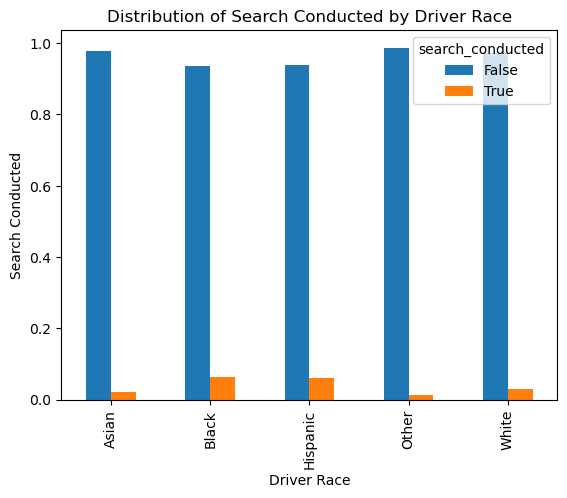

In [21]:
# Aalyze if there are any patterns in search behavior based on driver demography
# Race
search_by_race=police.groupby('driver_race')['search_conducted'].value_counts(normalize=True).unstack()
search_by_race.plot(kind="bar")
plt.xlabel("Driver Race")
plt.ylabel("Search Conducted")
plt.title("Distribution of Search Conducted by Driver Race")

Text(0.5, 1.0, 'Distribution of Search Conducted by Driver Gender')

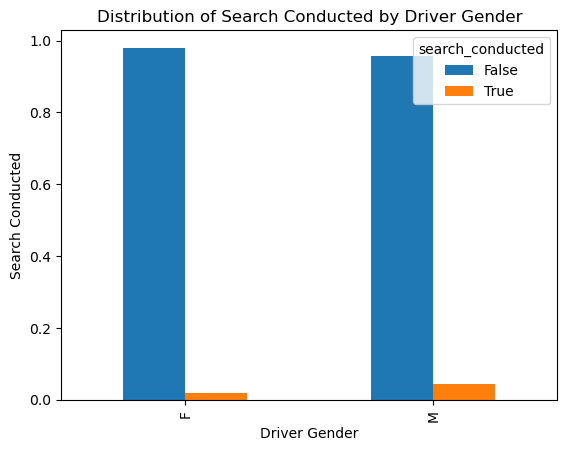

In [22]:
# Aalyze if there are any patterns in search behavior based on driver demography
# Gender
search_by_race=police.groupby('driver_gender')['search_conducted'].value_counts(normalize=True).unstack()
search_by_race.plot(kind="bar")
plt.xlabel("Driver Gender")
plt.ylabel("Search Conducted")
plt.title("Distribution of Search Conducted by Driver Gender")

Text(0.5, 1.0, 'Distribution of Search Conducted by Violation')

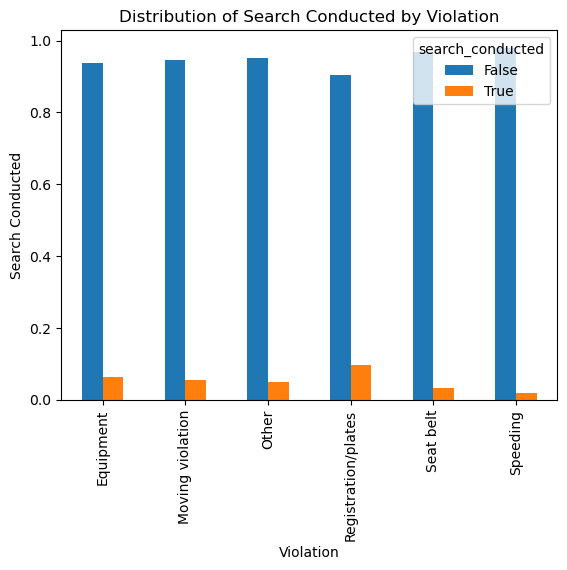

In [23]:
# Analyze if there are any patterns in search behavior based on violation
search_by_race=police.groupby('violation')['search_conducted'].value_counts(normalize=True).unstack()
search_by_race.plot(kind="bar")
plt.xlabel("Violation")
plt.ylabel("Search Conducted")
plt.title("Distribution of Search Conducted by Violation")

### Outcome Analysis

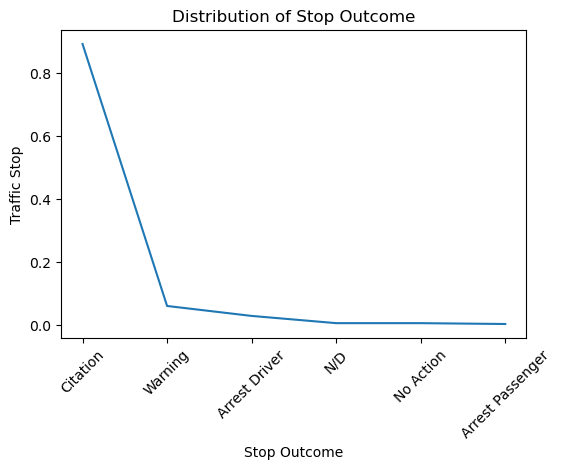

In [26]:
# Calculate the proportions of different outcomes
stop_outcome=police.stop_outcome.value_counts(normalize=True)
plt.figure(figsize=(6, 4))
stop_outcome.plot(kind='line', stacked=True)
plt.xlabel('Stop Outcome')
plt.ylabel('Traffic Stop')
plt.title('Distribution of Stop Outcome')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

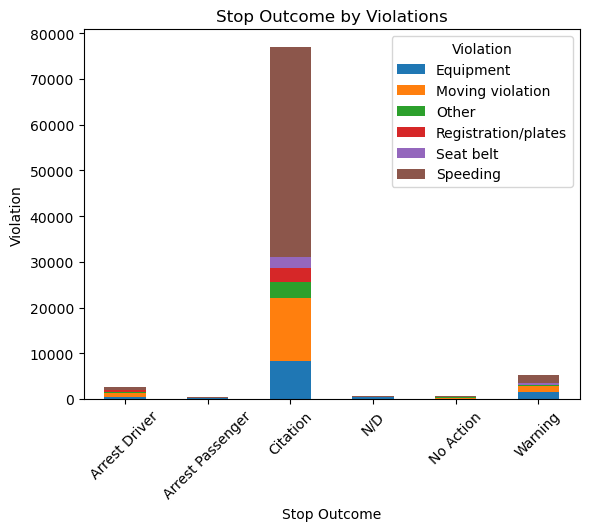

In [27]:
# Explore the outcomes of traffic stops, such as citations, warnings, or arrests
outcome_by_violation=police.groupby("stop_outcome")["violation"].value_counts().unstack()
plt.figure(figsize=(12, 8))
outcome_by_violation.plot(kind='bar', stacked=True)
plt.xlabel('Stop Outcome')
plt.ylabel('Violation')
plt.title('Stop Outcome by Violations')
plt.legend(title='Violation')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='stop_year'>

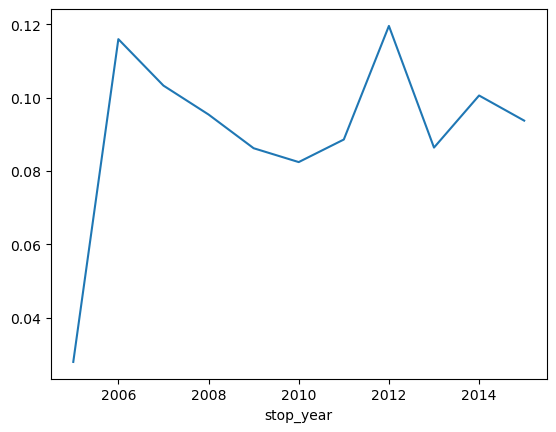

In [28]:
# Analyze traffic stops over time by examining trends in stop_year
police.stop_year.value_counts(normalize=True).sort_index().plot()

<Axes: xlabel='stop_month'>

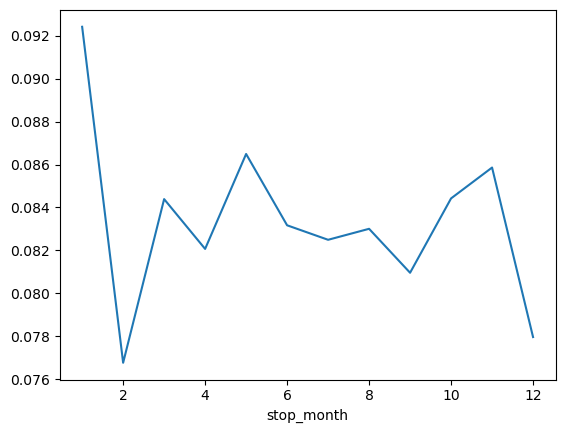

In [29]:
# Analyze traffic stops over time by examining trends in stop_month
police.stop_month.value_counts(normalize=True).sort_index().plot()

<Axes: xlabel='stop_day'>

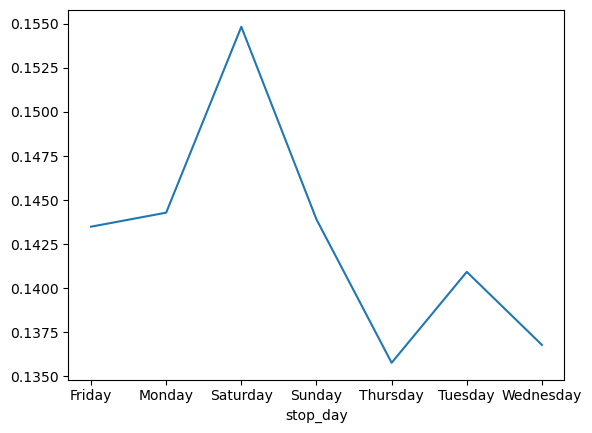

In [30]:
# Analyze traffic stops over time by examining trends in stop_day
police.stop_day.value_counts(normalize=True).sort_index().plot()